In [69]:
# importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
# loading the dataset
df=pd.read_csv("/content/StudentsPerformance[1].csv")

In [71]:
# Getting the first 5 rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [72]:
# Getting the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [73]:
# checking for the missing values
(df.isnull().sum()*100)/df.shape[0]

,0
gender,0.0
race/ethnicity,0.0
parental level of education,0.0
lunch,0.0
test preparation course,0.0
math score,0.0
reading score,0.0
writing score,0.0


In [74]:
# getting the statistical summary
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [75]:
#Extracting our input column
x=df.iloc[:,-2].values.reshape(-1,1)

In [76]:
#Extracting our output column
y=df.iloc[:,-1].values.reshape(-1,1)

In [77]:
# Split Data into Training and Testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [78]:
# Making the object of the Linear Regression
lr=LinearRegression()

In [79]:
# Training the Linear Model
lr.fit(x_train,y_train)

LinearRegression()

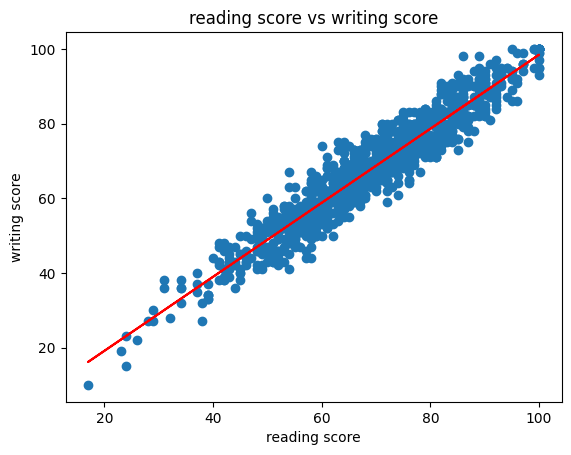

In [80]:
# Findint the Straight Line
plt.scatter(df['reading score'],df['writing score'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.title('reading score vs writing score')
plt.show()

In [81]:
# Regression Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [82]:
y_pred=lr.predict(x_test)

In [83]:
print("MAE :- ",mean_absolute_error(y_test,y_pred))

MAE :-  3.6442679020846147


In [84]:
print("MSE :- ",mean_squared_error(y_test,y_pred))

MSE :-  21.04951673738452


In [85]:
print("RMSE- ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE-  4.587975232865204


In [86]:
print("R2 Score :- ",r2_score(y_test,y_pred))

R2 Score :-  0.9103474733277205


In [87]:
adjusted_r2=1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [88]:
print("Adjusted R2 Score is :- ",adjusted_r2)

Adjusted R2 Score is :-  0.9098946827889716
